<h1> Objective:- Assessment Task 2.3D: Document analysis and
recognition </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 2210470832 </b></div>

In [2]:
#Importing all library
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from math import log
import statistics
import time

Step 1 :  Load image from file and binarise the image using a threshold, e.g., 200 (see Section 2.1 in Task 2.2C for
reference).

True

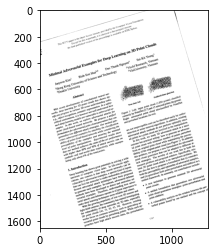

In [3]:
#Loading an image
doc = cv.imread('doc.jpg', 0) #Note that the second parameter of imread is set to 0

#Binarise the image
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)

plt.imshow(doc_bin, 'gray')
cv.imwrite('doc_bin.png', doc_bin) #writing the binary image

Step 2 : Get negative version of the binarised image by subtracting the binarised image from 255

True

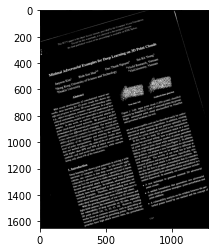

In [4]:
doc_bin = 255 - doc_bin #convert black/white to white/black 
plt.imshow(doc_bin, 'gray')
cv.imwrite('neg_doc_bin.png', doc_bin) #writing the binary image

Step 3. Extract connected components from the negative image. Note that morphology is NOT used here.

In [5]:
# connected component labelling
num_labels, labels_im = cv.connectedComponents(doc_bin)

def ExtractConnectedComponents(num_labels, labels_im):
    connected_components = [[] for i in range(0, num_labels)]
    height, width = labels_im.shape
    for i in range(0, height):
        for j in range(0, width):
            if labels_im[i, j] >= 0:
                connected_components[labels_im[i, j]].append((j, i))

    return connected_components

connected_components = ExtractConnectedComponents(num_labels, labels_im)

Step 4. Select candidate points on the negative image using one of the following strategies

In [6]:
# #Strategy A
# connected_components

In [7]:
#Strategy B
def getConnectedCenters(connected_components):
    candidate_points = []
    for c in connected_components:
        num_components = len(c)
        coordinate_list = zip(*c)
        center_points = []
        for x in coordinate_list:
            cp = round(sum(x)/num_components)
            center_points.append(cp)
        candidate_points.append(center_points)
        
    return candidate_points


strategy_b_cp = getConnectedCenters(connected_components)

In [8]:
#Strategy C

def getMax(connected_components):
    candidate_points = []
    for c in connected_components:
        max_y = 0
        max_coordinate_pair = []
        for x in c:
            if max_y < x[1]:
                max_y = x[1]
                max_coordinate_pair = x
        if len(max_coordinate_pair) > 0:
            candidate_points.append([max_coordinate_pair[0], max_coordinate_pair[1]])
    return candidate_points

strategy_c_cp = getMax(connected_components)

Step 5. Remove all pixels which are not candidate points from the negative image.

In [9]:
def filterImage(img, candidate_point):
    height, width = img.shape
    zero_img = np.zeros((height, width), np.uint8)
    for i in range(0, len(candidate_point)):
        coordinates = candidate_point[i]
        x = coordinates[0]
        y = coordinates[1]
        zero_img[y][x] = 255
    return zero_img

True

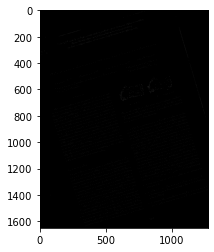

In [10]:
#Strategy B
filter_pixel_strategy_b = filterImage(doc_bin, strategy_b_cp)

plt.imshow(filter_pixel_strategy_b, 'gray')
cv.imwrite('filter_image_b.png', filter_pixel_strategy_b) #writing the binary image

True

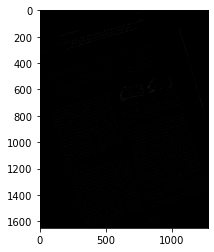

In [11]:
#Strategy C
filter_pixel_strategy_c = filterImage(doc_bin, strategy_c_cp)

plt.imshow(filter_pixel_strategy_c, 'gray')
cv.imwrite('filter_image_c.png', filter_pixel_strategy_c) #writing the binary image

Step 7. Apply Hough transform on the negative image using the following command

Strategy B lines

In [12]:
spatial_res = 1
angular_res = np.pi/180
threshold = 10

lines_b = cv.HoughLines(filter_pixel_strategy_b, spatial_res, angular_res, threshold)

Strategy C lines

In [13]:
spatial_res = 1
angular_res = np.pi/180
threshold = 10

lines_c = cv.HoughLines(filter_pixel_strategy_c, spatial_res, angular_res, threshold)

Step 8. Create an array to store the angles of all lines detected by Hough transform.

In [14]:
#Strategy B
orientations_b = np.zeros(len(lines_b), np.float32)

for k in range(0, len(lines_b)):
    distance, angle = lines_b[k][0]
    orientations_b[k] = angle
    
orientation_b = statistics.median(orientations_b)
print(orientation_b)

#Strategy C
orientations_c = np.zeros(len(lines_c), np.float32)

for k in range(0, len(lines_c)):
    distance, angle = lines_c[k][0]
    orientations_c[k] = angle
    
orientation_c = statistics.median(orientations_c)
print(orientation_c)

1.2915436
1.2915436


In [22]:
#finding orthogonal angle

ortho_angle_b = np.pi - (np.pi/2 + orientation_b)
ortho_angle_b = (np.pi/2 - orientation_b)
print(ortho_angle_b)

ortho_angle_c = np.pi - (np.pi/2 + orientation_c)
print(ortho_angle_c*180/np.pi)


0.27925272385147615
16.000002494221842


89.9

In [17]:
# rotate image with strategy b
height, width = doc_bin.shape
doc_bin = 255 - doc_bin
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, -ortho_angle_b * 180 /np.pi, 1)
doc_deskewed = cv.warpAffine(doc_bin, M, (width, height))
# plt.imshow(doc_deskewed, 'gray')
cv.imwrite('doc_bin_deskewed_b.png', doc_deskewed) #writing the binary image

# rotate image with strategy c
height, width = doc_bin.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, -ortho_angle_c * 180 /np.pi, 1)
doc_deskewed = cv.warpAffine(doc_bin, M, (width, height))
# plt.imshow(doc_deskewed, 'gray')
cv.imwrite('doc_bin_deskewed_c.png', doc_deskewed) #writing the binary image

True

### 2) Performance Analysis

2.1) Candidate point selection

In [16]:
#Strategy B:
t0 = time.time()
def getConnectedCenters(connected_components):
    candidate_points = []
    for c in connected_components:
        num_components = len(c)
        coordinate_list = zip(*c)
        center_points = []
        for x in coordinate_list:
            cp = round(sum(x)/num_components)
            center_points.append(cp)
        candidate_points.append(center_points)
    return candidate_points

strategy_b_cp = getConnectedCenters(connected_components)

t1 = time.time() #Stop timer
time_strategy_b = t1-t0
print(time_strategy_b)

0.6647658348083496


In [17]:
#Strategy C
t0 = time.time()
def getMax(connected_components):
    candidate_points = []
    for c in connected_components:
        max_y = 0
        max_coordinate_pair = []
        for x in c:
            if max_y < x[1]:
                max_y = x[1]
                max_coordinate_pair = x
        if len(max_coordinate_pair) > 0:
            candidate_points.append([max_coordinate_pair[0], max_coordinate_pair[1]])
    return candidate_points

strategy_c_cp = getMax(connected_components)
t1 = time.time() #Stop timer
time_strategy_c = t1-t0
print(time_strategy_c)

0.08500075340270996


#### Conclusion: Time complexity for strategy B is very high compared to A and B.

### 4) Text recognition using pytesseract

In [18]:
import pytesseract
text = pytesseract.image_to_string(doc_deskewed)
print(text)

Jaeyeon Kim! Binh-Son Hua?*

4Deakin University

Abstract

With recent developments of convolutional neural net-
works, deep learning for 3D point clouds has shown sig-
nificant progress in various 3D scene understanding tasks,
€.g., object recognition, semantic segmentation. In a safety-
critical environment, it is however not well understood how
such deep learning models are vuinerable to adversarial ex-
amples, In this work, we explore adversarial attacks for
point cloud-based neural networks. We propose a unified
formulation for adversarial point cloud generation that can
generalise two different attack strategies. Our method gen-
erates adversarial examples by attacking the classification
ability of point cloud-based networks while considering the
perceptibility of the examples and ensuring the minimal
level of point manipulations. Experimental results show
that our method achieves the state-of-the-art performance
with higher than 89% and 90% of attack success rate on
synthetic an

In [19]:
pdf = pytesseract.image_to_pdf_or_hocr(doc_deskewed, extension='pdf')
with open('deskewed_pdf.pdf','w+b') as f:
    f.write(pdf)